# Image Processing and Data Augmentation Methods

## Objective

Understand ways to find a data set and to prepare a data set for machine learning and training.

## Activities 
- Image Preprocessing Techniques
- Data Augmentation Techniques



## Finding the  Potato Leaf Data set

Artificial intelligence projects depend upon data. When beginning a project, data scientists look for existing data sets that are similar to or match the given problem. This saves time and money, and leverages the work of others, building upon the body of knowledge for all future projects. 

Typically we begin with a search engine query for existing dataset
then we start making and building the customized data set

## Part 1: Image Preprocessing

### 1.1 Inspect Channels

The images are usually stored in an RGB (Red Green Blue) format. In this format the image is represented as a three-dimensional (or three-channel) array. Now, we will take a look at three different channels individually for a random image. 

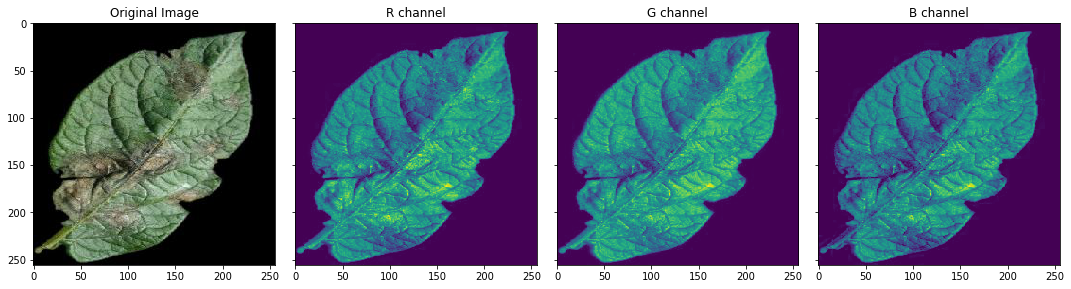

In [1]:
#Inspect R, G, B Channels indivudally
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

prcessed_leaf_path = "/hdd/data/leaf_data_set/plantdisease/potato"

file_list = glob.glob("/hdd/data/leaf_data_set/plantdisease/potato/*/*")
img_path = random.choice(file_list)
image = mpimg.imread(img_path)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (15,15))

#Original Image
axes[0].set_title('Original Image')
axes[0].imshow(image)
# R channel
axes[1].set_title('R channel')
axes[1].imshow(image[:, :, 0])
# G channel.
axes[2].set_title('G channel')
axes[2].imshow(image[:, :, 1])
# B channel.
axes[3].set_title('B channel')
axes[3].imshow(image[:, :, 2])

plt.setp([axes[1].get_yticklabels()], visible=False)
plt.setp([axes[2].get_yticklabels()], visible=False)
plt.setp([axes[3].get_yticklabels()], visible=False)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

### 1.2 RGB-BGR Conversion

Due to the underlying OpenCV implementation of imread, in some of the neural network topologies we need to convert an image from RGB to BGR format. 

If RGB is represented (0,1,2), then  BGR=> (2,1,0)

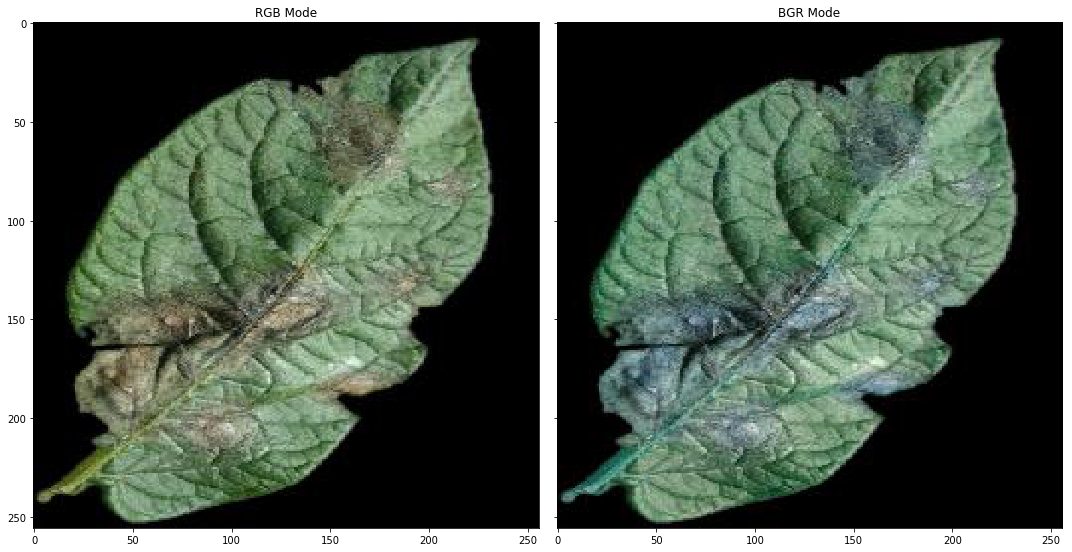

In [2]:
#Plot in RGB & BGR Mode
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,15))

#Image in RGB
axes[0].set_title('RGB Mode')
axes[0].imshow(image)
#Image in BGR
axes[1].set_title('BGR Mode')
axes[1].imshow(image[:, :, (2,1,0)])


plt.setp([axes[1].get_yticklabels()], visible=False)

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

### 1.3 Rescaling

Rescaling is an operation that moves your data from one numerical range to another by simple division using a predefined constant. In deep neural networks you might want to restrict your input to the range from 0 to 1, due to possible overflow, optimization, stability issues, and so on.

We use the Keras ImageDataGenerator  class, which allows us to do all transformations on the fly

In [3]:
#Rescale Images
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np 

img_height, img_width = 299, 299
#train_path = "../Dataset/" + "SubsetVMMR/"
train_path = "/hdd/data/leaf_data_set/plantdisease/potato/train/"
def compare_images(img1, img2, Title1="Original", Title2 ="Transformed", scale_option=False):
    if type(img1) == np.ndarray:
        img1 = array_to_img(img1, scale=scale_option)
    if type(img2) == np.ndarray:
        img2 = array_to_img(img2, scale=scale_option)
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    plt.imshow(img1)
    plt.axis("off")
    plt.title(Title1, fontsize=18)
    plt.subplot(122)
    plt.imshow(img2)
    plt.axis("off")
    plt.title(Title2, fontsize=18)
#Rescale colors
datagen_rescaled = ImageDataGenerator(rescale=1. / 255.)
datagen_default = ImageDataGenerator()

gen_default = datagen_default.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
gen_rescaled = datagen_rescaled.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)

sample_default = next(gen_default)
sample_rescaled = next(gen_rescaled)

Using TensorFlow backend.


Found 3014 images belonging to 3 classes.
Found 3014 images belonging to 3 classes.


By rescaling an image, we are dividing each pixel with 255 and having a look at the transformed array representations helps you understand your transformations. The **scale_option** parameter helps you understand the image transformation better. It's default value is set to **False** and hence you can see the difference. If you change it **True**, you will see that two images are the same since **array_to_img** module rescales it back to original image. 

[array([[0., 0.],
        [0., 0.]], dtype=float32), array([[0., 0.],
        [0., 0.]], dtype=float32)]

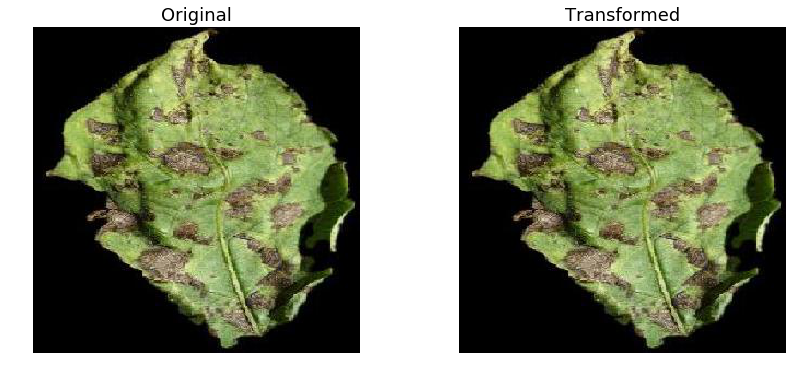

In [4]:
#Plot images to make comparison
compare_images(sample_default[0], sample_rescaled[0], scale_option = True)
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_rescaled[0][:2, :2, 0]]

### 1.4 Grayscaling

Grayscaling turns a color RGB image into images with only shades of gray representing colors. This pair of transformations can throw away noisy pixels and detect shapes in the picture. Nowadays, all these operations are learned through convolutional neural networks. 

Found 3014 images belonging to 3 classes.


[array([[0., 0.],
        [0., 0.]], dtype=float32), array([[0., 0.],
        [0., 0.]], dtype=float32)]

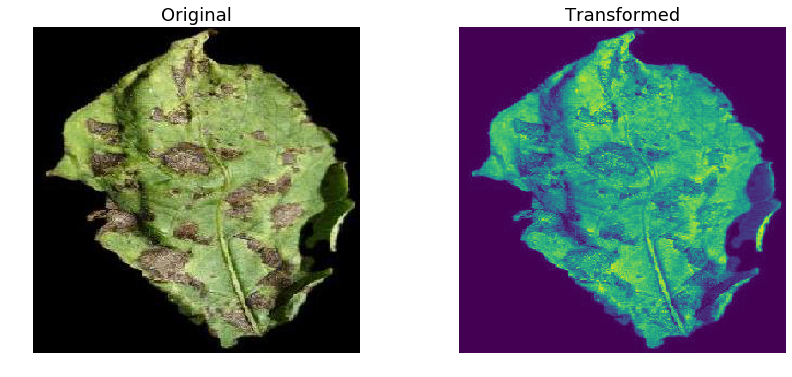

In [5]:
#Image Grayscaling
gen_grayscaled = datagen_default.flow_from_directory(train_path, 
                                                     target_size=(img_height, img_width), 
                                                     batch_size=1, 
                                                     shuffle=False, 
                                                     class_mode=None, 
                                                     color_mode="grayscale")
sample_grayscaled = next(gen_grayscaled)
compare_images(sample_default[0], sample_grayscaled[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_grayscaled[0][:2, :2, 0]]

### 1.5 Samplewise centering (across features inside one sample)

We’ve already seen that raw data values are from 0 to 255. So, one sample is a 3D array of numbers from 0 to 255. Following the optimization stability considerations (get rid of vanishing or saturating values problems) we might want to normalize the dataset such that the mean value of each data sample would be equal to 0.

By looking at the the following values we can understand it a better:

np.mean(sample_samplewise_mean[0][:,:,i]) where i = 0,1,2 and overall sum would be equal to zero. 

Found 3014 images belonging to 3 classes.


[array([[0., 0.],
        [0., 0.]], dtype=float32), array([[-62.870335, -62.870335],
        [-62.870335, -62.870335]], dtype=float32)]

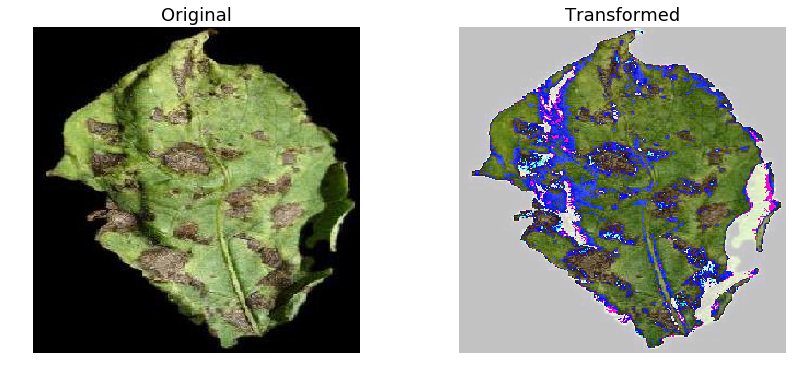

In [6]:
#Samplewise centering 
datagen_samplewise_mean = ImageDataGenerator(samplewise_center=True)
gen_samplewise_mean = datagen_samplewise_mean.flow_from_directory(train_path, 
                                                                  target_size=(img_height, img_width), 
                                                                  batch_size=1, 
                                                                  shuffle=False,  
                                                                  class_mode=None)
sample_samplewise_mean = next(gen_samplewise_mean)
compare_images(sample_default[0], sample_samplewise_mean[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_samplewise_mean[0][:2, :2, 0]]

### 1.6 Samplewise std normalization (across features inside one sample)

This preprocessing step follows the same idea as samplewise centering, but instead of setting the mean value to 0, it sets the standard deviation value to 1.

**Activity**

Set **samplewise_std_normalization** to True to create your generator. 

Found 3014 images belonging to 3 classes.


[array([[0., 0.],
        [0., 0.]], dtype=float32), array([[0., 0.],
        [0., 0.]], dtype=float32)]

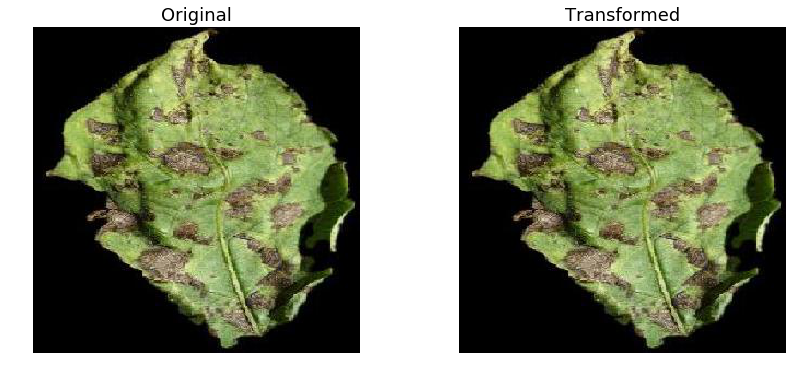

In [9]:
#Sampliwse std normalization
datagen_samplewise_std = ImageDataGenerator(samplewise_std_normalization=False)
gen_samplewise_std = datagen_samplewise_std.flow_from_directory(train_path, 
                                                                target_size=(img_height, img_width), 
                                                                batch_size=1, 
                                                                shuffle=False, 
                                                                class_mode=None)
sample_samplewise_std = next(gen_samplewise_std)
compare_images(sample_default[0], sample_samplewise_std[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_samplewise_std[0][:2, :2, 0]]

## Part 2: Data Augmentation Techniques

In this section, we’re going to look at more data-dependent transformations, which explicitly use the graphical nature of data. These kinds of transformations are often used for data augmentation procedures.

### 2.1 Rotation

This transformation rotates the image in a certain direction (clockwise or counterclockwise).

**Activity**

Change **rotation_range** to a degree of your choice so that the image will be rotated with that degree in clockwise direction. Example: rotation_range = 45

Found 3014 images belonging to 3 classes.


[array([[0., 0.],
        [0., 0.]], dtype=float32), array([[0., 0.],
        [0., 0.]], dtype=float32)]

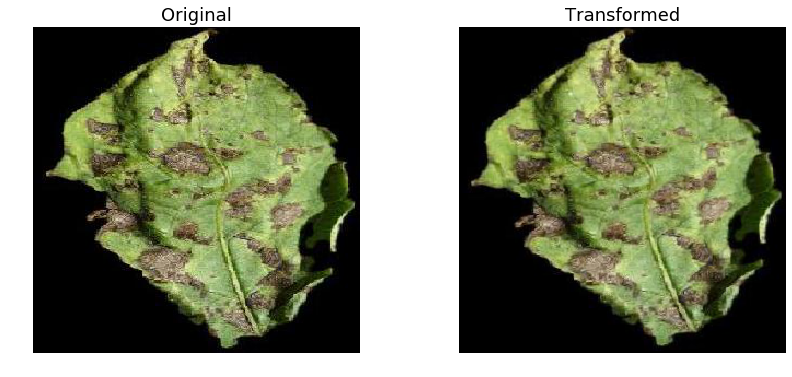

In [10]:
#Image Rotation
datagen_rotated = ImageDataGenerator(rotation_range=45, fill_mode="constant")
gen_rotated = datagen_rotated.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
sample_rotated = next(gen_rotated)
compare_images(sample_default[0], sample_rotated[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_rotated[0][:2, :2, 0]]

### 2.2 Horizontal & Vertical Shift

This technique can shift an image horizontally or vertically.

Found 3014 images belonging to 3 classes.
Found 3014 images belonging to 3 classes.


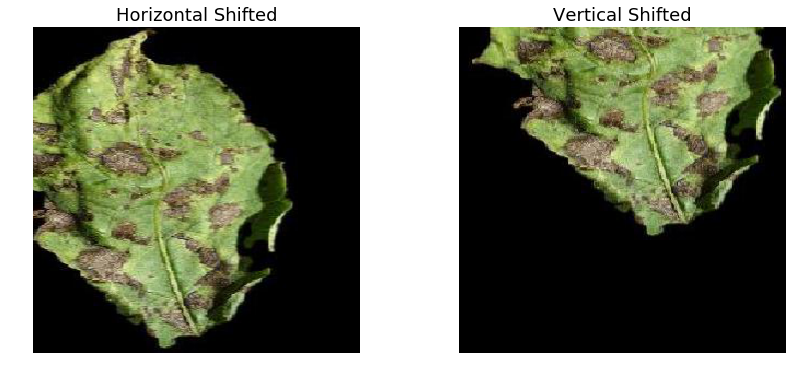

In [11]:
#Horizontal and Vertical Shift
datagen_hshifted = ImageDataGenerator(width_shift_range=0.4, fill_mode="constant")
datagen_vshifted = ImageDataGenerator(height_shift_range=0.4, fill_mode="constant")

gen_hshifted = datagen_hshifted.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
gen_vshifted = datagen_vshifted.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
sample_hshifted = next(gen_hshifted)
sample_vshifted = next(gen_vshifted)
compare_images(sample_hshifted[0], sample_vshifted[0], Title1="Horizontal Shifted", Title2="Vertical Shifted")

### 2.3 Horizontal & Vertical Flip

With this method, we can flip an image both ways.

**Activity** 

Create generators. Example: 

datagen_hflipped = ImageDataGenerator(horizontal_flip=True)

datagen_vflipped = ImageDataGenerator(vertical_flip=True)

Found 3014 images belonging to 3 classes.
Found 3014 images belonging to 3 classes.


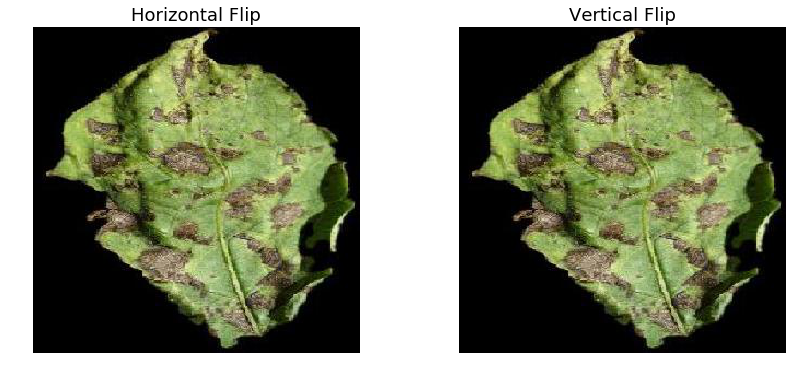

In [12]:
#Horizontal and Vertical Flip
datagen_hflipped = ImageDataGenerator(horizontal_flip=True)
datagen_vflipped = ImageDataGenerator(vertical_flip=True)

gen_hflipped = datagen_hflipped.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
gen_vflipped = datagen_vflipped.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
sample_hflipped = next(gen_hflipped)
sample_vflipped = next(gen_vflipped)
compare_images(sample_hflipped[0], sample_vflipped[0], Title1="Horizontal Flip", Title2="Vertical Flip")

### 2.4 Zoom & Shearing

You can zoom in an image or do shearing which displaces each point in a direction by an amount proportional to its distance from an edge of the image.

Found 3014 images belonging to 3 classes.
Found 3014 images belonging to 3 classes.


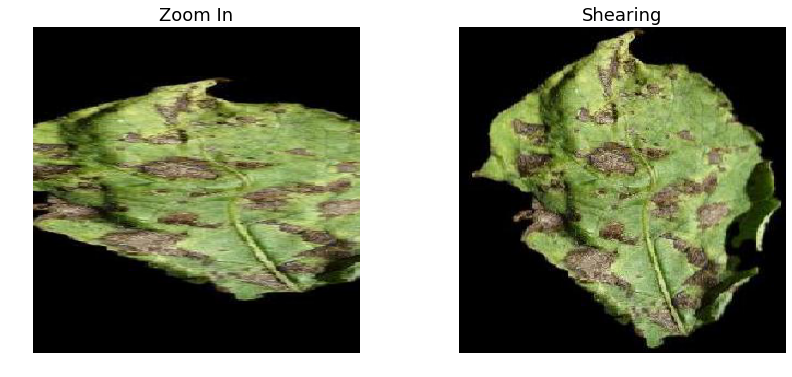

In [13]:
#Zoom in and Shearing 
datagen_sheared = ImageDataGenerator(shear_range=0.75, fill_mode="constant")
datagen_zoomed = ImageDataGenerator(zoom_range=0.5, fill_mode="constant")

gen_sheared = datagen_sheared.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
gen_zoomed = datagen_zoomed.flow_from_directory(train_path, 
                                                target_size=(img_height, img_width), 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode=None)
sample_sheared = next(gen_sheared)
sample_zoomed = next(gen_zoomed)
compare_images(sample_zoomed[0], sample_sheared[0], Title1="Zoom In", Title2="Shearing")

### 2.5 Combination

It's possible to apply all these image transformation techniques at once and create new data samples. 

hdd


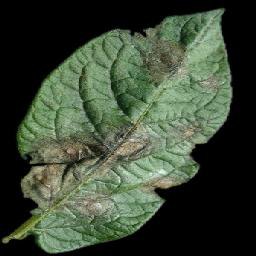

In [14]:
#Select a random image and follow the next step
datagen = ImageDataGenerator(rotation_range=45, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.3, 
                             horizontal_flip=True, 
                             vertical_flip=True, 
                             fill_mode="nearest")
#Load example image
img = load_img(img_path)
print(img_path.split("/")[1])
img

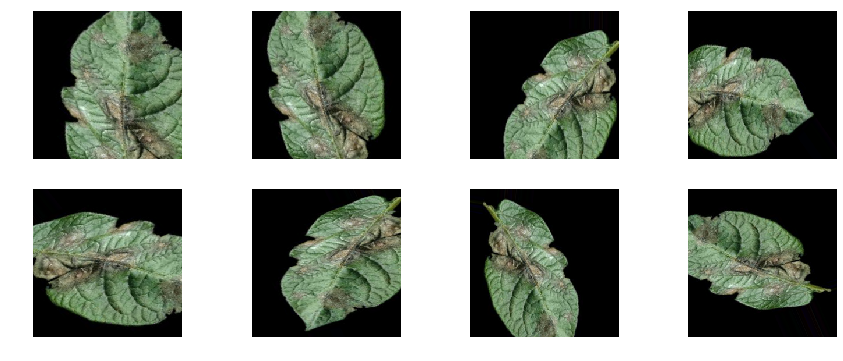

In [15]:
#Apply different augmentation techniques
img = img_to_array(img)
img = img.reshape((1,) + img.shape)
n_augmentations = 8
plt.figure(figsize=(15, 6))    
i = 0

for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    
    i += 1
    if i >= n_augmentations:
        break